<a href="https://colab.research.google.com/github/AkkapakaManikanta/forklift_YOLOv5/blob/master/yolov5_forklift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AkkapakaManikanta/yolov5_forklift.git
#clone the repository which has YOLOv5 and dataset in it

Cloning into 'yolov5_forklift'...
remote: Enumerating objects: 2138, done.
remote: Counting objects: 100% (2138/2138), done.
remote: Compressing objects: 100% (2093/2093), done.
remote: Total 2138 (delta 51), reused 2127 (delta 40), pack-reused 0
Receiving objects: 100% (2138/2138), 29.87 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
%cd yolov5_forklift

/content/yolov5_forklift


In [ ]:
%pip install -qr requirements.txt
#requirements

     |████████████████████████████████| 596 kB 7.0 MB/s 


**Traning the model**

In [ ]:
!python train.py --img 640 --batch 16 --epochs 200 --data coco_forklift.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco_forklift.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 b834d33 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

**Results**

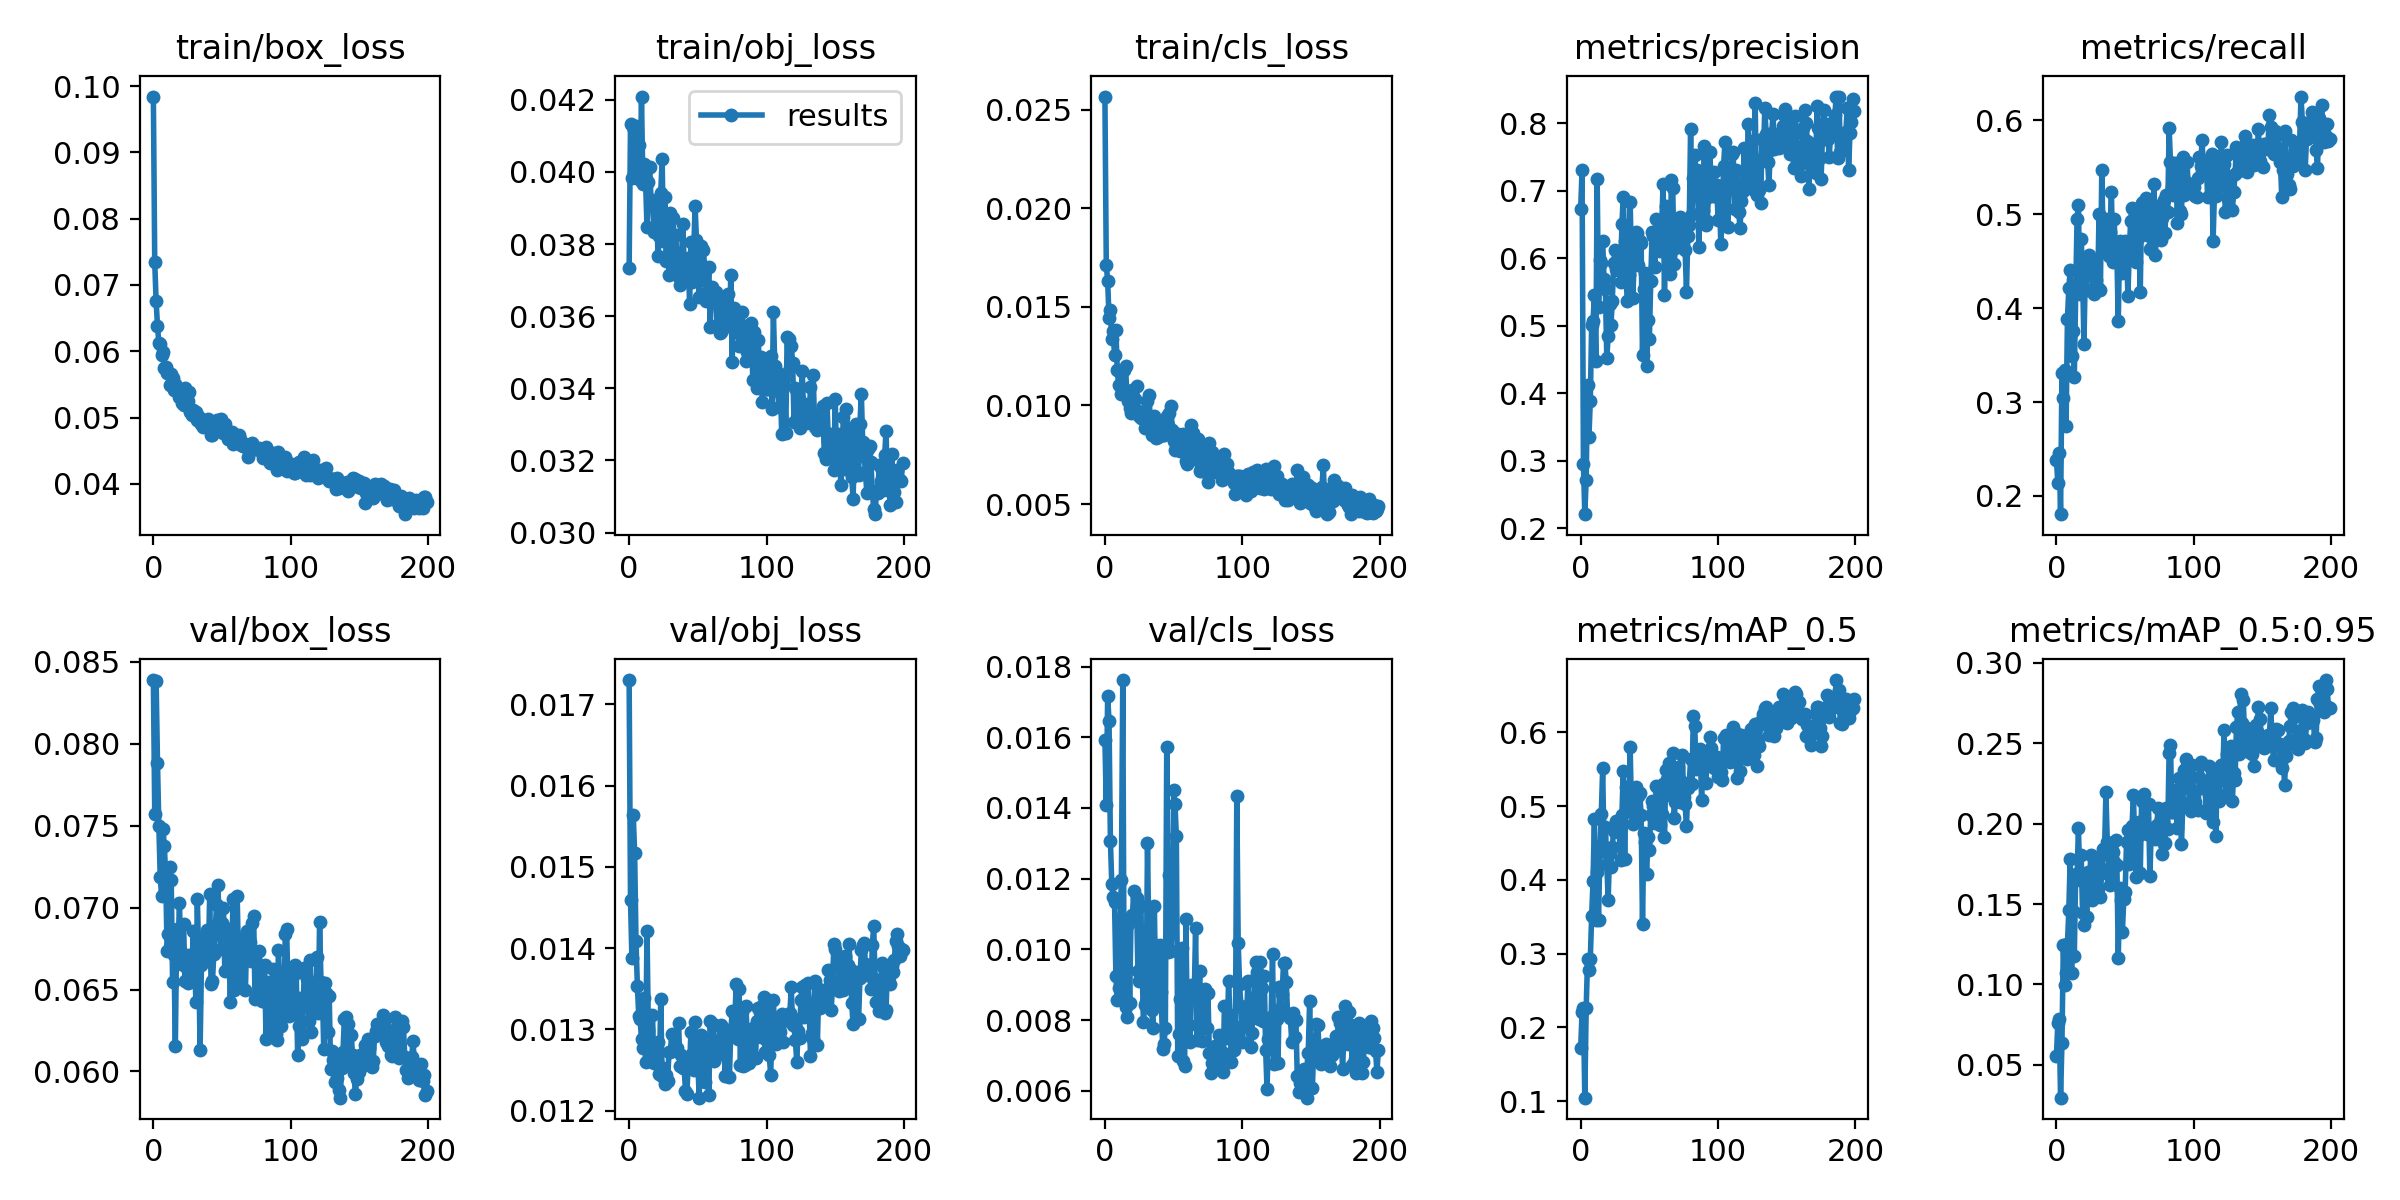

In [ ]:
from IPython.display import Image
Image('runs/train/exp/results.png')

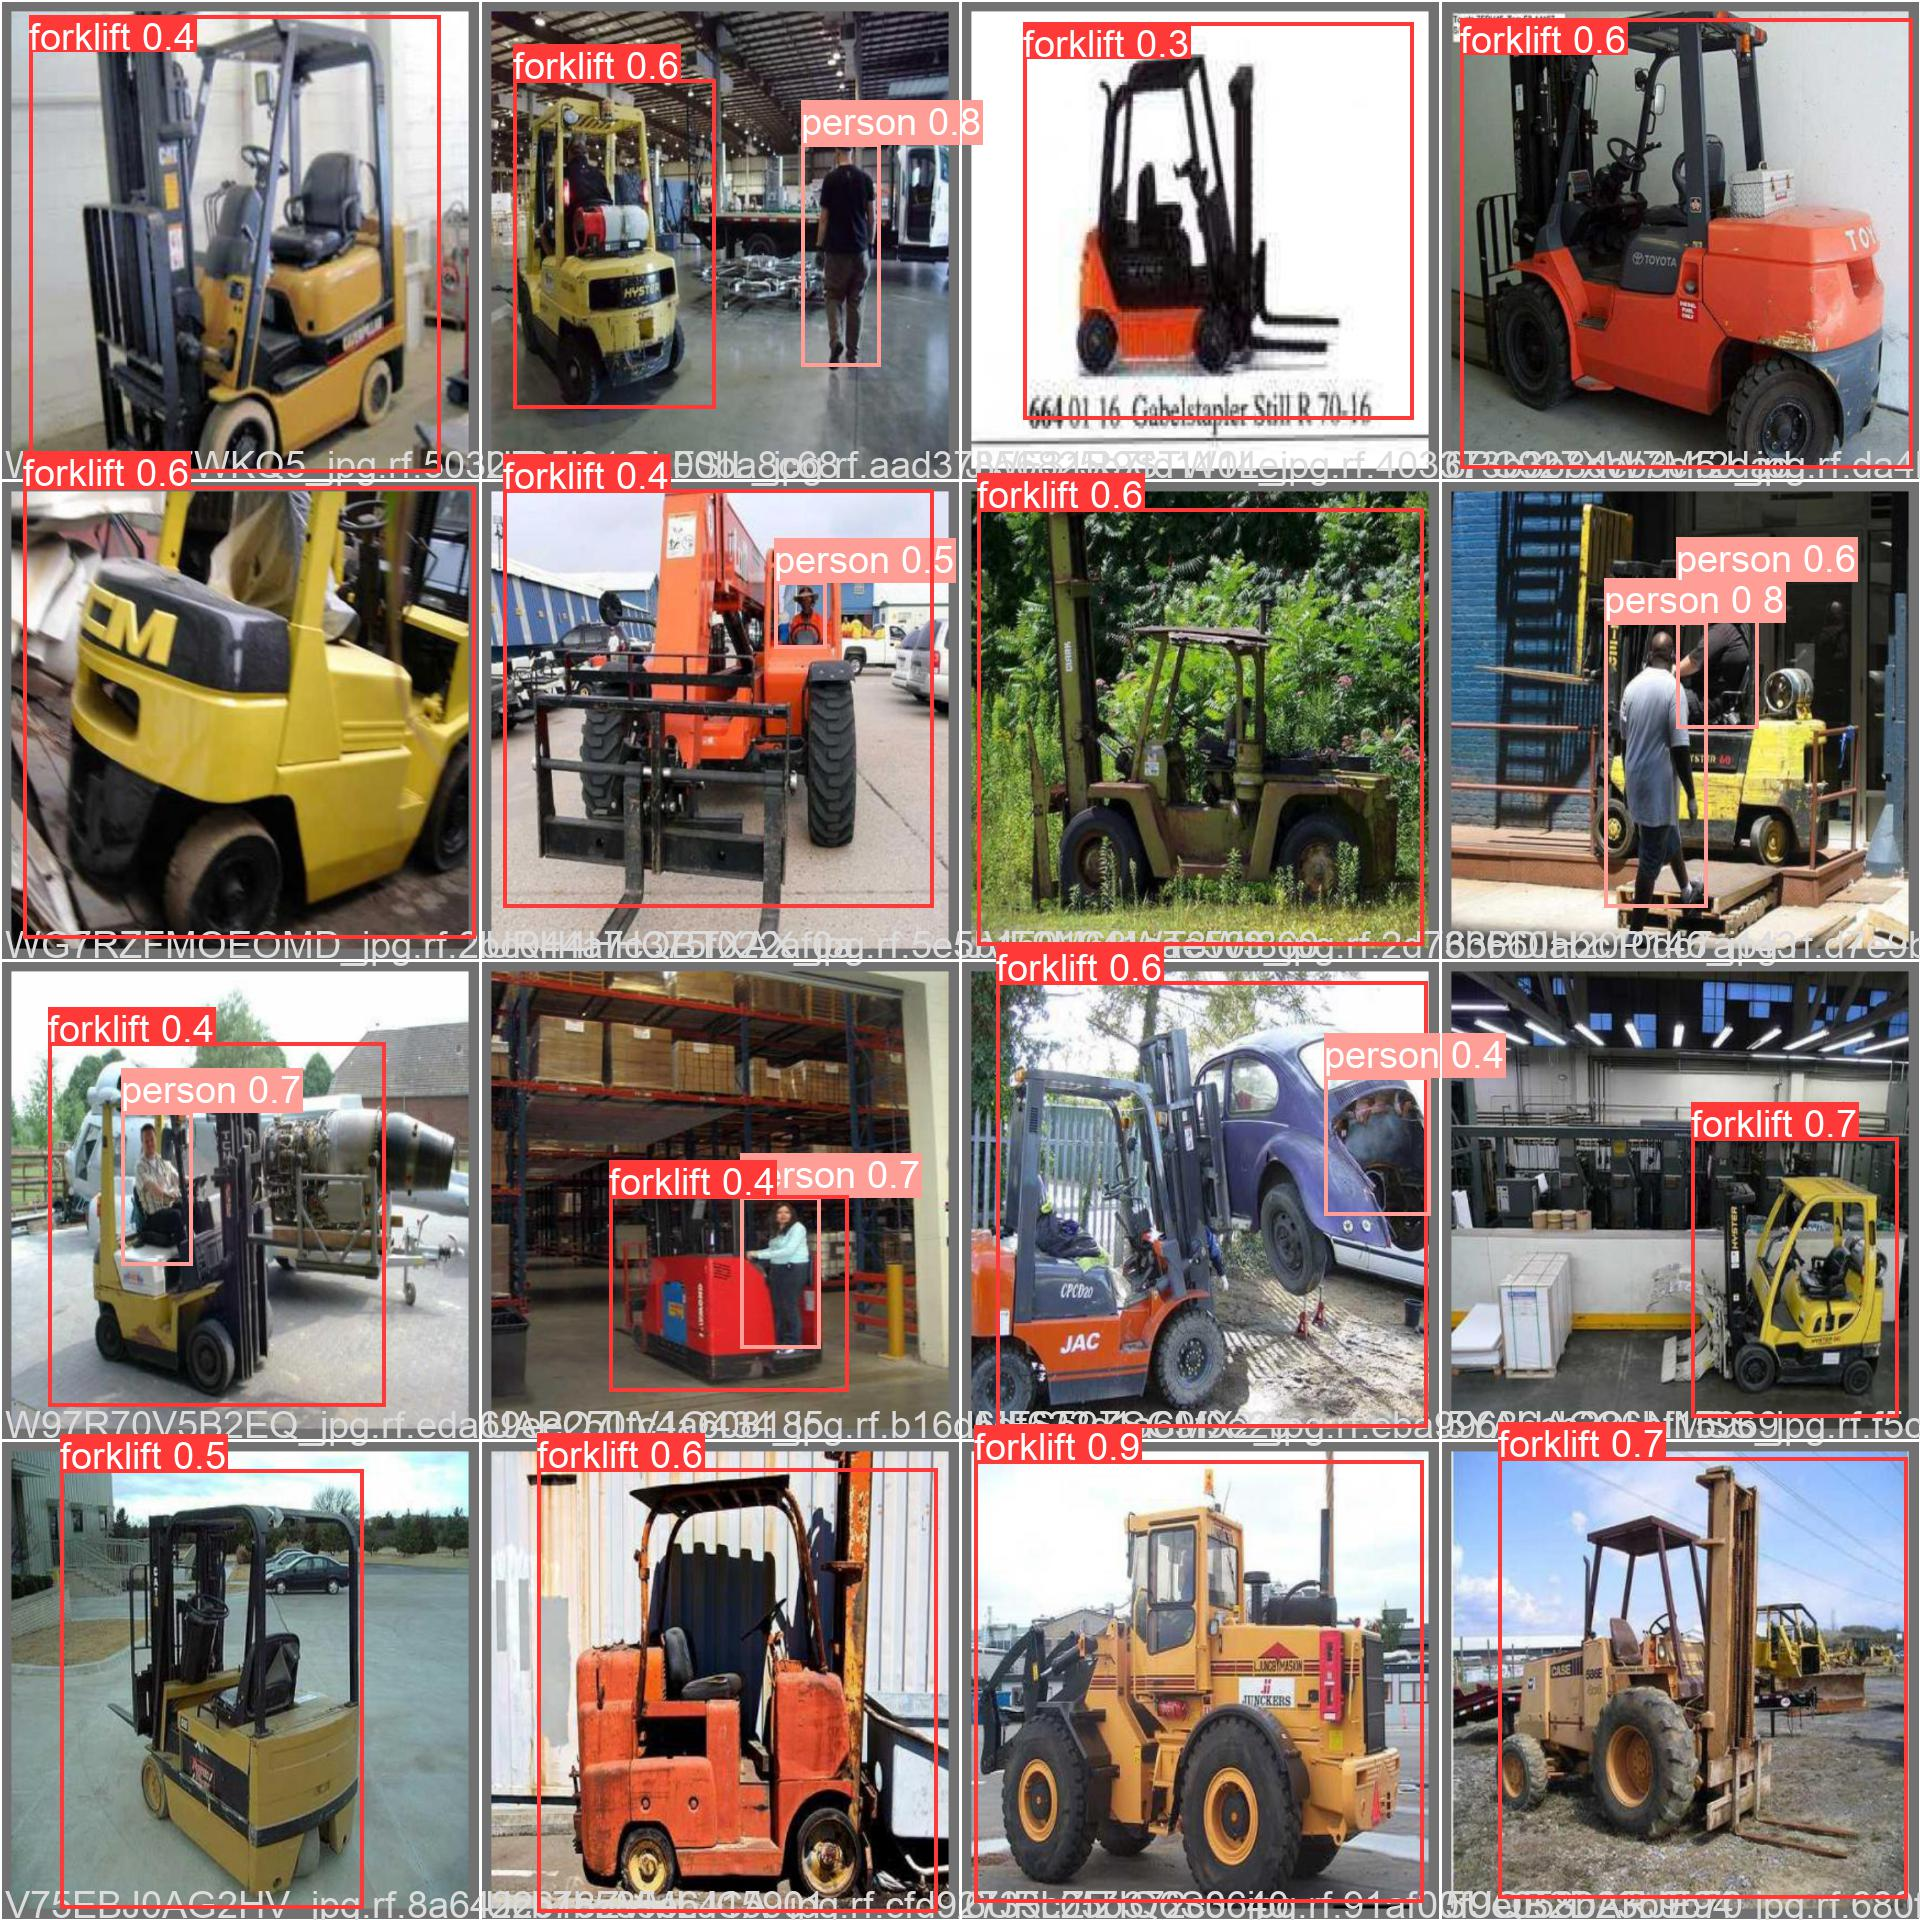

In [ ]:
#detected images
Image('runs/train/exp/val_batch1_pred.jpg')

**Detection using videos**

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source ../video_forklift2.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=../video_forklift2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 b834d33 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/324) /content/video_forklift2.mp4: 384x640 Done. (0.013s)
video 1/1 (2/324) /content/video_forklift2.mp4: 384x640 Done. (0.009s)
video 1/1 (3/324) /content/video_forklift2.mp4: 384x640 Done. (0.009s)
video 1/1 (4/324) /content/video_forklift2.mp4: 384x640 Done. (0.009s)
video 1/1 (5/324) /content/video_forklift2.mp4: 384x640 Done. (0.009s)
video 1/1 (6

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.30 --source ../video_forklift4.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=../video_forklift4.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 b834d33 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/394) /content/video_forklift4.mp4: 384x640 1 forklift, Done. (0.012s)
video 1/1 (2/394) /content/video_forklift4.mp4: 384x640 1 forklift, Done. (0.008s)
video 1/1 (3/394) /content/video_forklift4.mp4: 384x640 Done. (0.009s)
video 1/1 (4/394) /content/video_forklift4.mp4: 384x640 Done. (0.009s)
video 1/1 (5/394) /content/video_forklift4.mp4: 384x640 Done

**Testing**

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data coco_forklift.yaml --img 640 --iou 0.65 --half --task test